### Demographic Data Analyzer

- How many people of each race are represented in this dataset? This should be a Pandas series with race names as the index labels. (race column)
- What is the average age of men?
- What is the percentage of people who have a Bachelor's degree?
- What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?
- What percentage of people without advanced education make more than 50K?
- What is the minimum number of hours a person works per week?
- What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?
- What country has the highest percentage of people that earn >50K and what is that percentage?
- Identify the most popular occupation for those who earn >50K in India.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('adult.data')
df.index.name = 'id'
df.head(5)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
id,,,,,,,,,,,,,,,
0,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
1,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
2,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
3,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
4,37,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K


In [ ]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race',
        'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']
df.columns = cols
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
id,,,,,,,,,,,,,,,
0,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
1,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
2,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K




---



How many people of each race are represented in this dataset? This should be a Pandas series with race names as the index labels. (race column)

In [ ]:
task1 = df['race'].value_counts()
task1

,count
race,
White,22048
Black,2451
Asian-Pac-Islander,805
Amer-Indian-Eskimo,251
Other,219




---



What is the average age of men?

In [ ]:
df['sex'] = df['sex'].str.strip()
male_df = df[df['sex'] == 'Male']
average_age = int(male_df['age'].mean())
print(f'Average age of Men is: {average_age}')

Average age of Men is: 39




---



What is the percentage of people who have a Bachelor's degree?

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
id,,,,,,,,,,,,,,,
0,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
1,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
2,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
3,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
4,37,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K


In [ ]:
education = df['education'].value_counts()
general = int(education.sum())
df['education'] =  df['education'].str.strip()
bach_age = int(df[df['education'] == 'Bachelors']['education'].count())
percentage = bach_age / general
print(f'What is the percentage of people who have a Bachelor"s degree?\n{round(percentage, 4)}%')

What is the percentage of people who have a Bachelor"s degree?
0.1653%




---


What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?

In [ ]:
df['salary'] = df['salary'].str.strip()
filter_sal = df[df['salary'] == '>50K']
filter_educ = filter_sal[(filter_sal['education'] == 'Bachelors') | (filter_sal['education'] == 'Masters') | (filter_sal['education'] == 'Doctorate')]
more50 = filter_educ['salary'].count()

general = df[(df['education'] == 'Bachelors') | (df['education'] == 'Masters') | (df['education'] == 'Doctorate')]
general = general['salary'].count()

result = round((more50 / general) * 100, 2)

print(f"What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?\nAnswer: {result}%")

What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?
Answer: 46.31%


In [ ]:
print(f"Amount of Educated People Earning more that 50K: {more50}\nGeneral number of educated people: {general}")

Amount of Educated People Earning more that 50K: 2745
General number of educated people: 5927




---

What percentage of people without advanced education make more than 50K?

In [ ]:
new_df = df[df['salary'] == '>50K']
new_df = new_df[~new_df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]
total = len(df[df['salary'] == '>50K'])
non_adv = len(new_df)
res = round((non_adv/total) * 100)
res

55

In [ ]:
print(f'What percentage of people without advanced education make more than 50K?\nAnswer: {res}%')

What percentage of people without advanced education make more than 50K?
Answer: 55%




---


What is the minimum number of hours a person works per week?

In [ ]:
df.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
id,,,,,,,,,,,,,,,
0,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K


In [ ]:
min_hours = df['hours-per-week'].min()
print(f'What is the minimum number of hours a person works per week?\nAnswer: {min_hours}')

What is the minimum number of hours a person works per week?
Answer: 1.0




---


What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?

In [ ]:
min_hour_more_sal = df[df['salary'] == '>50K']
min_hour_more_sal = min_hour_more_sal[min_hour_more_sal['hours-per-week'] == min_hours]
general_more_sal = len(df[df['salary'] == '>50K'])
min_hour_sal = len(min_hour_more_sal)

print(f'What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?\nAnswer: {round((min_hour_sal / general_more_sal) * 100, 4)}')

What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?
Answer: 0.0324




---


What country has the highest percentage of people that earn >50K and what is that percentage?

In [ ]:

df.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
id,,,,,,,,,,,,,,,
0,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K


In [ ]:
total_num_people = df.groupby('native-country')['age'].count()
total_num_people

,age
native-country,
?,463
Cambodia,16
Canada,101
China,63
Columbia,46
Cuba,74
Dominican-Republic,55
Ecuador,19
El-Salvador,76


In [ ]:
country_more_50 = df[df['salary'] == '>50K']
country_more_50 = country_more_50.groupby('native-country')['age'].count()
country_more_50

,age
native-country,
?,113
Cambodia,4
Canada,35
China,15
Columbia,2
Cuba,16
Dominican-Republic,2
Ecuador,2
El-Salvador,7


In [ ]:
country = ((country_more_50 / total_num_people) * 100).idxmax()
percentage = round(((country_more_50 / total_num_people) * 100).max(), 2)
print(f'What country has the highest percentage of people that earn >50K and what is that percentage?\nAnswer: {country} = {percentage}%')

What country has the highest percentage of people that earn >50K and what is that percentage?
Answer:  France = 45.45%




---


Identify the most popular occupation for those who earn >50K in India.

In [ ]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
id,,,,,,,,,,,,,,,
0,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
1,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K


In [ ]:
df['native-country'] = df['native-country'].str.strip()
ocupation_more50 = df[(df['salary'] == '>50K') & (df['native-country'] == 'India')]
ocupation_more50['occupation'].value_counts()

,count
occupation,
Prof-specialty,14
Exec-managerial,7
Other-service,2
Tech-support,1
Transport-moving,1
Sales,1


In [ ]:
most_popular_ocup = ocupation_more50['occupation'].value_counts().idxmax()
amount = ocupation_more50['occupation'].value_counts().max()
amount

14

In [ ]:
print(f'Identify the most popular occupation for those who earn >50K in India.\nAnswer: Occupation = "{most_popular_ocup}"\n        Amount = {amount}')

Identify the most popular occupation for those who earn >50K in India.
Answer: Occupation = " Prof-specialty"
        Amount = 14




---



### Visualization

    How many people of each race are represented?
    → Bar chart: x = race names, y = counts.

    Average age of men
    → Simple metric, but for visualization you could do a histogram or density plot of men’s ages.

    Percentage of people with a Bachelor's degree
    → Pie chart: "Bachelor’s" vs "Other".

    % of people with advanced education (Bachelors, Masters, Doctorate) making >50K
    → Horizontal bar chart comparing “Advanced Edu >50K %” vs “Non-Advanced Edu >50K %”.

    % of people without advanced education making >50K
    → (same chart as above, both together).

    Minimum number of hours a person works per week
    → Could highlight with a vertical line on a histogram of “hours-per-week”.

    % of people working min hours/week that earn >50K
    → Pie chart: “>50K” vs “<=50K” only for min-hours workers.


###     How many people of each race are represented? → Bar chart: x = race names, y = counts.

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
id,,,,,,,,,,,,,,,
0,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
1,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
2,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
3,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
4,37,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K


In [ ]:
count_of_racers = df['race'].value_counts()
rece = df['race'].unique()
count_of_racers

,count
race,
White,22048
Black,2451
Asian-Pac-Islander,805
Amer-Indian-Eskimo,251
Other,219


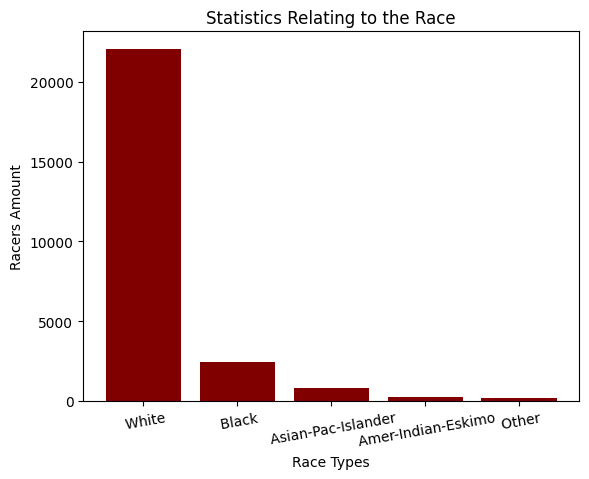

In [ ]:
plt.bar(count_of_racers.index, count_of_racers.values, color = 'maroon')
plt.axis = (0, 10, 5000, 25000)

plt.title('Statistics Relating to the Race')
plt.xlabel('Race Types')
plt.ylabel('Racers Amount')
plt.xticks(rotation = 10)
plt.show()



---



### Average age of men → Simple metric, but for visualization you could do a histogram or density plot of men’s ages.

In [ ]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
id,,,,,,,,,,,,,,,
0,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
1,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
2,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
3,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
4,37,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
5,49,Private,160187,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
7,31,Private,45781,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
8,42,Private,159449,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


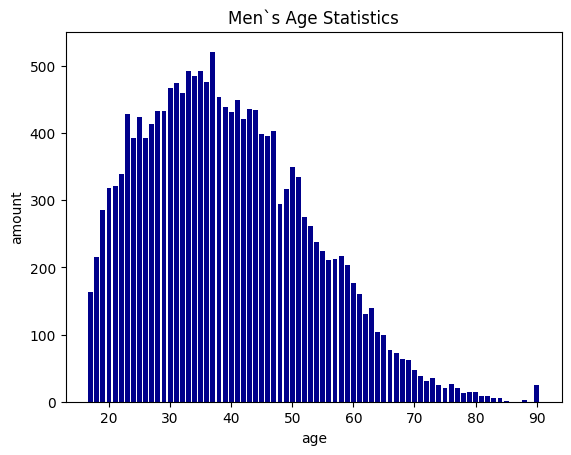

In [ ]:
avg_men = df[df['sex'] == 'Male']['age'].value_counts()
plt.bar(avg_men.index, avg_men.values, color = 'darkblue')
plt.xlabel('age')
plt.ylabel('amount')
plt.title('Men`s Age Statistics')

plt.ylim(0, 550)
plt.show()



---



###  Percentage of people with a Bachelor's degree → Pie chart: "Bachelor’s" vs "Other".

In [ ]:
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
id,,,,,,,,,,,,,,,
0,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
1,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
2,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K


In [ ]:
bach_others = df[(df['education'] == 'Bachelors') | (df['education'] == 'Masters') | (df['education'] == 'Doctorate')]
bach_others

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
id,,,,,,,,,,,,,,,
0,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
3,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
4,37,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
7,31,Private,45781,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
8,42,Private,159449,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25741,40,Private,53835,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,50.0,United-States,>50K
25745,42,Private,125280,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,3137.0,0.0,40.0,United-States,<=50K
25750,38,Local-gov,194630,Bachelors,13.0,Never-married,Protective-serv,Not-in-family,White,Female,4787.0,0.0,43.0,United-States,>50K


In [ ]:
bach_others = bach_others['education'].value_counts()
bach_others

,count
education,
Bachelors,4260
Masters,1341
Doctorate,326


Text(0.5, 1.0, 'Advanced Educated Relational Satistics')

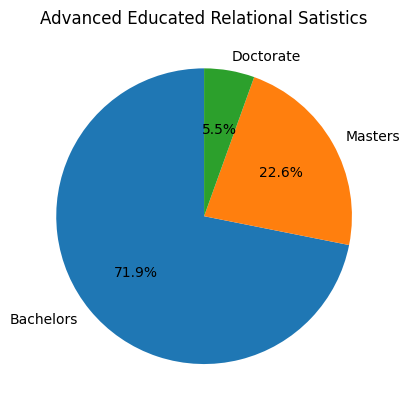

In [ ]:
plt.pie(bach_others.values, labels = bach_others.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Advanced Educated Relational Satistics')




---



### % of people with advanced education (Bachelors, Masters, Doctorate) making >50K → Horizontal bar chart comparing “Advanced Edu >50K %” vs “Non-Advanced Edu >50K %”.

In [ ]:
vis_more50 = df[df['salary'] == '>50K']
vis_more50 = vis_more50[(vis_more50['education'] == 'Bachelors') | (vis_more50['education'] == 'Masters') | (vis_more50['education'] == 'Doctorate')]
vis_more50

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
id,,,,,,,,,,,,,,,
7,31,Private,45781,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
8,42,Private,159449,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K
10,30,State-gov,141297,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,India,>50K
18,43,Self-emp-not-inc,292175,Masters,14.0,Divorced,Exec-managerial,Unmarried,White,Female,0.0,0.0,45.0,United-States,>50K
19,40,Private,193524,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,60.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25732,26,Private,181920,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,White,Female,0.0,0.0,45.0,United-States,>50K
25738,35,Self-emp-inc,79586,Masters,14.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,India,>50K
25741,40,Private,53835,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,50.0,United-States,>50K


In [ ]:
vis_non_more50 = df[df['salary'] == '>50K']
vis_non_more50 = vis_non_more50[~vis_non_more50['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]
vis_non_more50

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
id,,,,,,,,,,,,,,,
6,52,Self-emp-not-inc,209642,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
9,37,Private,280464,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0.0,0.0,80.0,United-States,>50K
13,40,Private,121772,Assoc-voc,11.0,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,?,>50K
26,54,?,180211,Some-college,10.0,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0.0,0.0,60.0,South,>50K
37,31,Private,84154,Some-college,10.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,38.0,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25759,48,State-gov,120131,HS-grad,9.0,Divorced,Craft-repair,Own-child,White,Male,8614.0,0.0,40.0,United-States,>50K
25761,60,Self-emp-not-inc,27886,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
25763,52,Private,123011,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K


In [ ]:
vis_non_more50['education'].value_counts()

,count
education,
HS-grad,1336
Some-college,1059
Prof-school,327
Assoc-voc,283
Assoc-acdm,210
10th,59
11th,52
7th-8th,33
12th,26
